# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

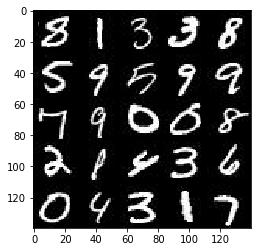

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

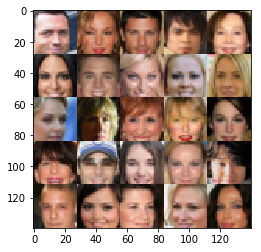

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")

    return inputs_real, inputs_z, learning_rate
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # OK: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/dhruva.gupta/anaconda3/lib/p

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
#'''
def discriminator(images, reuse=False,  alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    drop_rate = .4 
    with tf.variable_scope('discriminator', reuse = reuse ):
        x1 = tf.layers.dropout(images, rate=drop_rate)
        
        #x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x1 = tf.maximum(alpha * x1, x1)
        X1 = tf.layers.dropout(x1, rate=drop_rate)
        # 16x16x64
        
        #x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x128
        
        #x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        X3 = tf.layers.dropout(x3, rate=drop_rate)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits

'''
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # OK: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer 1
        h1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        lrelu1 = tf.maximum(alpha * h1, h1)
        
        
        # Hidden Layer 2
        h2 = tf.layers.conv2d(lrelu1, 128, 5, strides=1, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn2 = tf.layers.batch_normalization(h2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        
        
        # Hidden Layer 3
        h3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding="SAME", 
                             kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn3 = tf.layers.batch_normalization(h3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        #Flatten
        flat = tf.reshape(lrelu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits
'''
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        # 7X7X256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #print(logits.shape)
        # 28x28x3 now
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    # TODO: Implement Function
    #Generator
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    #Discriminator
    smooth = 0.1
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [var for var in update_ops if var.name.startswith('discriminator')]
    g_updates = [var for var in update_ops if var.name.startswith('generator')]
    
    with tf.control_dependencies(d_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    #g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    #with tf.control_dependencies(g_updates):
    #    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    ''' 
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    '''
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Set the image dimensions
    _, image_width, image_height, image_channels = data_shape

    # Implement model_inputs to set the input_real, input_z, and learning rate
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)

   # Implement model_loss to set the d_loss and g_loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)


    # Implement model_opt to set d_train_opt and g_train_opt
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    # Batch counter
    batch_count = 0
    
    # Number of images to print
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # Multiply batch_images by 2.0 since the dataset ranges from -0.5 to 0.5
                batch_images = batch_images*2.0
                
                # Random noise for generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # Increment the batch count
                batch_count += 1

                # Print the d_train_loss and g_train_loss every 10 batches
                if (batch_count % 10 == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))   
                    
                # Print the generator output every 100 batches
                if (batch_count % 100 == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4843... Generator Loss: 7.0915
Epoch 1/2... Discriminator Loss: 1.4329... Generator Loss: 2.2591
Epoch 1/2... Discriminator Loss: 1.8878... Generator Loss: 0.4033
Epoch 1/2... Discriminator Loss: 2.2041... Generator Loss: 4.8357
Epoch 1/2... Discriminator Loss: 2.8439... Generator Loss: 0.1449
Epoch 1/2... Discriminator Loss: 1.6781... Generator Loss: 0.4150
Epoch 1/2... Discriminator Loss: 1.0479... Generator Loss: 0.9491
Epoch 1/2... Discriminator Loss: 1.1708... Generator Loss: 1.9108
Epoch 1/2... Discriminator Loss: 1.9075... Generator Loss: 3.3186
Epoch 1/2... Discriminator Loss: 0.9597... Generator Loss: 1.7213


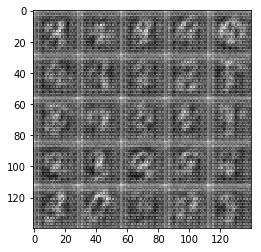

Epoch 1/2... Discriminator Loss: 1.0294... Generator Loss: 1.5212
Epoch 1/2... Discriminator Loss: 0.9729... Generator Loss: 1.5322
Epoch 1/2... Discriminator Loss: 0.9347... Generator Loss: 1.0527
Epoch 1/2... Discriminator Loss: 0.9690... Generator Loss: 1.4751
Epoch 1/2... Discriminator Loss: 1.0875... Generator Loss: 2.5622
Epoch 1/2... Discriminator Loss: 1.0857... Generator Loss: 2.7084
Epoch 1/2... Discriminator Loss: 0.9347... Generator Loss: 2.8848
Epoch 1/2... Discriminator Loss: 0.7771... Generator Loss: 1.8385
Epoch 1/2... Discriminator Loss: 0.8544... Generator Loss: 1.2262
Epoch 1/2... Discriminator Loss: 0.7581... Generator Loss: 1.5809


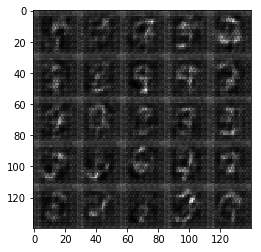

Epoch 1/2... Discriminator Loss: 0.8365... Generator Loss: 1.1343
Epoch 1/2... Discriminator Loss: 0.7473... Generator Loss: 1.9548
Epoch 1/2... Discriminator Loss: 0.7365... Generator Loss: 1.7726
Epoch 1/2... Discriminator Loss: 1.0066... Generator Loss: 0.9017
Epoch 1/2... Discriminator Loss: 1.3734... Generator Loss: 0.5292
Epoch 1/2... Discriminator Loss: 0.7385... Generator Loss: 1.8741
Epoch 1/2... Discriminator Loss: 1.8988... Generator Loss: 0.3050
Epoch 1/2... Discriminator Loss: 0.8691... Generator Loss: 1.0906
Epoch 1/2... Discriminator Loss: 0.7963... Generator Loss: 1.9630
Epoch 1/2... Discriminator Loss: 1.5572... Generator Loss: 3.3595


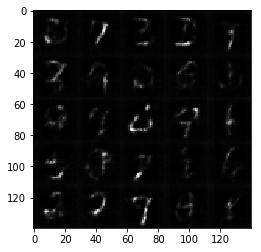

Epoch 1/2... Discriminator Loss: 0.9151... Generator Loss: 1.9945
Epoch 1/2... Discriminator Loss: 1.1240... Generator Loss: 0.6890
Epoch 1/2... Discriminator Loss: 1.0113... Generator Loss: 0.9867
Epoch 1/2... Discriminator Loss: 0.9340... Generator Loss: 1.5189
Epoch 1/2... Discriminator Loss: 0.9362... Generator Loss: 2.1212
Epoch 1/2... Discriminator Loss: 0.9858... Generator Loss: 1.0336
Epoch 1/2... Discriminator Loss: 1.5095... Generator Loss: 0.4282
Epoch 1/2... Discriminator Loss: 0.8938... Generator Loss: 1.1821
Epoch 1/2... Discriminator Loss: 1.4716... Generator Loss: 0.4506
Epoch 1/2... Discriminator Loss: 2.0358... Generator Loss: 0.3352


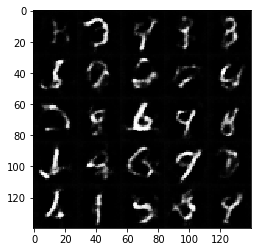

Epoch 1/2... Discriminator Loss: 1.5566... Generator Loss: 0.4412
Epoch 1/2... Discriminator Loss: 1.0677... Generator Loss: 0.9175
Epoch 1/2... Discriminator Loss: 1.1498... Generator Loss: 0.7379
Epoch 1/2... Discriminator Loss: 0.9229... Generator Loss: 1.3676
Epoch 1/2... Discriminator Loss: 1.7375... Generator Loss: 0.3467
Epoch 1/2... Discriminator Loss: 1.0953... Generator Loss: 1.0190
Epoch 1/2... Discriminator Loss: 1.3924... Generator Loss: 0.5056
Epoch 1/2... Discriminator Loss: 1.4315... Generator Loss: 0.5101
Epoch 1/2... Discriminator Loss: 0.8717... Generator Loss: 1.4120
Epoch 1/2... Discriminator Loss: 0.9588... Generator Loss: 1.1094


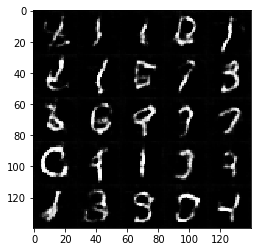

Epoch 1/2... Discriminator Loss: 1.4037... Generator Loss: 2.3429
Epoch 1/2... Discriminator Loss: 1.0321... Generator Loss: 1.1938
Epoch 1/2... Discriminator Loss: 1.5276... Generator Loss: 0.4415
Epoch 1/2... Discriminator Loss: 1.1666... Generator Loss: 0.7217
Epoch 1/2... Discriminator Loss: 0.9264... Generator Loss: 1.1348
Epoch 1/2... Discriminator Loss: 0.7847... Generator Loss: 1.5159
Epoch 1/2... Discriminator Loss: 0.9461... Generator Loss: 1.0189
Epoch 1/2... Discriminator Loss: 1.5882... Generator Loss: 0.4626
Epoch 1/2... Discriminator Loss: 1.4876... Generator Loss: 2.2018
Epoch 1/2... Discriminator Loss: 1.1472... Generator Loss: 1.6485


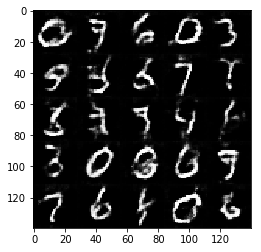

Epoch 1/2... Discriminator Loss: 1.0159... Generator Loss: 1.0078
Epoch 1/2... Discriminator Loss: 1.3781... Generator Loss: 0.7262
Epoch 1/2... Discriminator Loss: 0.9372... Generator Loss: 1.3334
Epoch 1/2... Discriminator Loss: 1.2101... Generator Loss: 0.7206
Epoch 1/2... Discriminator Loss: 1.1597... Generator Loss: 0.7553
Epoch 1/2... Discriminator Loss: 1.2443... Generator Loss: 0.6391
Epoch 1/2... Discriminator Loss: 1.1765... Generator Loss: 0.7294
Epoch 1/2... Discriminator Loss: 0.9781... Generator Loss: 1.3377
Epoch 1/2... Discriminator Loss: 1.2215... Generator Loss: 0.6445
Epoch 1/2... Discriminator Loss: 1.3755... Generator Loss: 0.5321


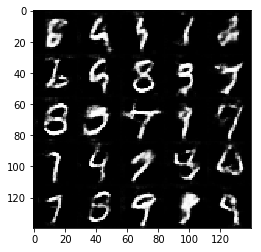

Epoch 1/2... Discriminator Loss: 1.1084... Generator Loss: 0.7545
Epoch 1/2... Discriminator Loss: 0.9993... Generator Loss: 0.8597
Epoch 1/2... Discriminator Loss: 1.0966... Generator Loss: 0.8948
Epoch 1/2... Discriminator Loss: 1.4129... Generator Loss: 0.5296
Epoch 1/2... Discriminator Loss: 1.1060... Generator Loss: 0.8001
Epoch 1/2... Discriminator Loss: 1.0303... Generator Loss: 1.3608
Epoch 1/2... Discriminator Loss: 1.2084... Generator Loss: 2.0186
Epoch 1/2... Discriminator Loss: 0.9689... Generator Loss: 1.1465
Epoch 1/2... Discriminator Loss: 2.2530... Generator Loss: 3.2786
Epoch 1/2... Discriminator Loss: 1.0043... Generator Loss: 0.9323


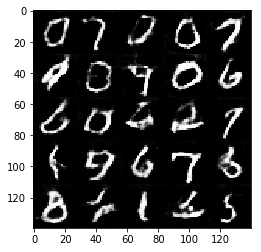

Epoch 1/2... Discriminator Loss: 0.9686... Generator Loss: 0.9548
Epoch 1/2... Discriminator Loss: 2.8418... Generator Loss: 3.2905
Epoch 1/2... Discriminator Loss: 1.0635... Generator Loss: 0.8692
Epoch 1/2... Discriminator Loss: 1.0419... Generator Loss: 1.0038
Epoch 1/2... Discriminator Loss: 1.0097... Generator Loss: 1.3353
Epoch 1/2... Discriminator Loss: 1.0284... Generator Loss: 1.8116
Epoch 1/2... Discriminator Loss: 0.8061... Generator Loss: 1.1735
Epoch 1/2... Discriminator Loss: 1.2272... Generator Loss: 0.6302
Epoch 1/2... Discriminator Loss: 1.8247... Generator Loss: 0.4384
Epoch 1/2... Discriminator Loss: 1.1043... Generator Loss: 0.7249


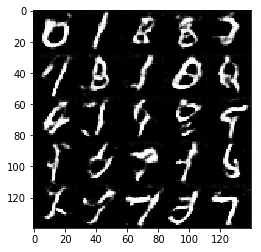

Epoch 1/2... Discriminator Loss: 0.9606... Generator Loss: 0.9285
Epoch 1/2... Discriminator Loss: 1.0572... Generator Loss: 0.8041
Epoch 1/2... Discriminator Loss: 1.1798... Generator Loss: 0.6385
Epoch 2/2... Discriminator Loss: 0.8449... Generator Loss: 1.3277
Epoch 2/2... Discriminator Loss: 1.0779... Generator Loss: 0.8345
Epoch 2/2... Discriminator Loss: 0.8883... Generator Loss: 1.4520
Epoch 2/2... Discriminator Loss: 0.9686... Generator Loss: 0.9988
Epoch 2/2... Discriminator Loss: 0.8135... Generator Loss: 1.3363
Epoch 2/2... Discriminator Loss: 2.4999... Generator Loss: 0.1637
Epoch 2/2... Discriminator Loss: 1.1143... Generator Loss: 0.7897


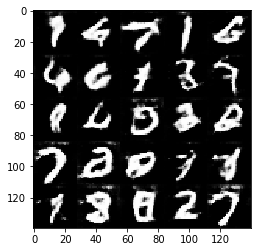

Epoch 2/2... Discriminator Loss: 0.8908... Generator Loss: 1.0591
Epoch 2/2... Discriminator Loss: 0.9696... Generator Loss: 1.0128
Epoch 2/2... Discriminator Loss: 0.9779... Generator Loss: 0.9952
Epoch 2/2... Discriminator Loss: 1.0242... Generator Loss: 0.8192
Epoch 2/2... Discriminator Loss: 1.0581... Generator Loss: 1.1299
Epoch 2/2... Discriminator Loss: 1.0461... Generator Loss: 0.8445
Epoch 2/2... Discriminator Loss: 1.0216... Generator Loss: 0.9015
Epoch 2/2... Discriminator Loss: 0.8666... Generator Loss: 1.1133
Epoch 2/2... Discriminator Loss: 1.0505... Generator Loss: 1.5456
Epoch 2/2... Discriminator Loss: 1.0621... Generator Loss: 0.8294


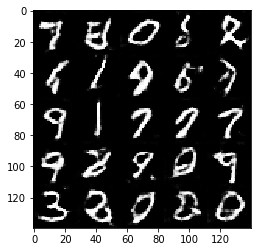

Epoch 2/2... Discriminator Loss: 1.3048... Generator Loss: 0.5929
Epoch 2/2... Discriminator Loss: 1.0222... Generator Loss: 2.1345
Epoch 2/2... Discriminator Loss: 1.1565... Generator Loss: 0.6844
Epoch 2/2... Discriminator Loss: 0.9005... Generator Loss: 2.7385
Epoch 2/2... Discriminator Loss: 1.2039... Generator Loss: 0.7661
Epoch 2/2... Discriminator Loss: 1.0231... Generator Loss: 1.5052
Epoch 2/2... Discriminator Loss: 0.9759... Generator Loss: 1.7311
Epoch 2/2... Discriminator Loss: 0.9250... Generator Loss: 1.6650
Epoch 2/2... Discriminator Loss: 1.4057... Generator Loss: 2.9313
Epoch 2/2... Discriminator Loss: 0.7926... Generator Loss: 1.3147


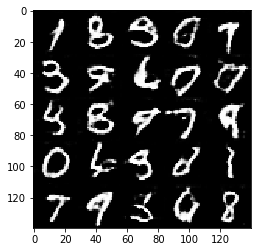

Epoch 2/2... Discriminator Loss: 1.0060... Generator Loss: 0.8713
Epoch 2/2... Discriminator Loss: 2.6117... Generator Loss: 0.1633
Epoch 2/2... Discriminator Loss: 1.1266... Generator Loss: 0.8194
Epoch 2/2... Discriminator Loss: 1.0280... Generator Loss: 0.8885
Epoch 2/2... Discriminator Loss: 0.8724... Generator Loss: 1.2186
Epoch 2/2... Discriminator Loss: 0.8236... Generator Loss: 1.5822
Epoch 2/2... Discriminator Loss: 2.1071... Generator Loss: 0.2489
Epoch 2/2... Discriminator Loss: 1.2231... Generator Loss: 0.6588
Epoch 2/2... Discriminator Loss: 1.1570... Generator Loss: 0.7094
Epoch 2/2... Discriminator Loss: 0.8271... Generator Loss: 1.1640


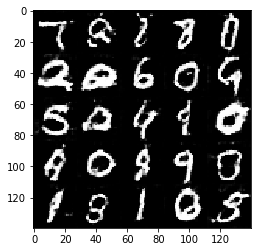

Epoch 2/2... Discriminator Loss: 1.3683... Generator Loss: 2.4762
Epoch 2/2... Discriminator Loss: 0.7794... Generator Loss: 1.7017
Epoch 2/2... Discriminator Loss: 1.7160... Generator Loss: 3.6552
Epoch 2/2... Discriminator Loss: 1.1867... Generator Loss: 2.7486
Epoch 2/2... Discriminator Loss: 1.1690... Generator Loss: 0.7211
Epoch 2/2... Discriminator Loss: 1.0027... Generator Loss: 0.8716
Epoch 2/2... Discriminator Loss: 0.7656... Generator Loss: 1.2812
Epoch 2/2... Discriminator Loss: 1.4670... Generator Loss: 0.4823
Epoch 2/2... Discriminator Loss: 1.1645... Generator Loss: 0.7022
Epoch 2/2... Discriminator Loss: 1.8759... Generator Loss: 4.0271


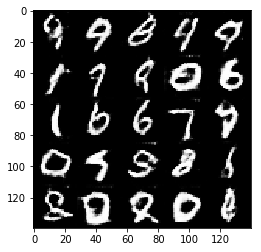

Epoch 2/2... Discriminator Loss: 1.2221... Generator Loss: 0.6884
Epoch 2/2... Discriminator Loss: 0.9173... Generator Loss: 1.0492
Epoch 2/2... Discriminator Loss: 0.8327... Generator Loss: 1.1684
Epoch 2/2... Discriminator Loss: 0.8391... Generator Loss: 1.3446
Epoch 2/2... Discriminator Loss: 0.9246... Generator Loss: 1.0347
Epoch 2/2... Discriminator Loss: 1.0754... Generator Loss: 0.8953
Epoch 2/2... Discriminator Loss: 1.0324... Generator Loss: 1.3331
Epoch 2/2... Discriminator Loss: 1.1727... Generator Loss: 0.7325
Epoch 2/2... Discriminator Loss: 0.7746... Generator Loss: 1.4339
Epoch 2/2... Discriminator Loss: 0.9767... Generator Loss: 0.9089


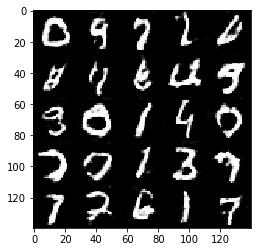

Epoch 2/2... Discriminator Loss: 0.8075... Generator Loss: 1.2065
Epoch 2/2... Discriminator Loss: 1.1051... Generator Loss: 0.8710
Epoch 2/2... Discriminator Loss: 1.4998... Generator Loss: 0.4882
Epoch 2/2... Discriminator Loss: 0.9077... Generator Loss: 1.0697
Epoch 2/2... Discriminator Loss: 1.0904... Generator Loss: 0.7977
Epoch 2/2... Discriminator Loss: 3.2282... Generator Loss: 4.8306
Epoch 2/2... Discriminator Loss: 0.9137... Generator Loss: 1.0045
Epoch 2/2... Discriminator Loss: 0.8113... Generator Loss: 1.4008
Epoch 2/2... Discriminator Loss: 0.9974... Generator Loss: 0.9166
Epoch 2/2... Discriminator Loss: 1.0278... Generator Loss: 2.1444


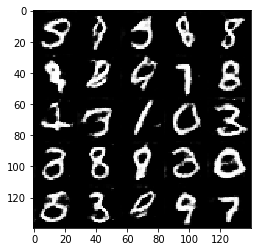

Epoch 2/2... Discriminator Loss: 1.0433... Generator Loss: 0.8233
Epoch 2/2... Discriminator Loss: 1.1401... Generator Loss: 0.7260
Epoch 2/2... Discriminator Loss: 0.7881... Generator Loss: 1.2493
Epoch 2/2... Discriminator Loss: 0.9482... Generator Loss: 0.9266
Epoch 2/2... Discriminator Loss: 0.7779... Generator Loss: 1.5652
Epoch 2/2... Discriminator Loss: 1.3221... Generator Loss: 0.5769
Epoch 2/2... Discriminator Loss: 0.8678... Generator Loss: 1.3016
Epoch 2/2... Discriminator Loss: 0.8008... Generator Loss: 1.2963
Epoch 2/2... Discriminator Loss: 0.8231... Generator Loss: 1.1177
Epoch 2/2... Discriminator Loss: 3.1665... Generator Loss: 5.2153


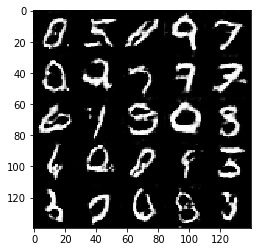

Epoch 2/2... Discriminator Loss: 1.1228... Generator Loss: 0.8496
Epoch 2/2... Discriminator Loss: 1.2817... Generator Loss: 0.6203
Epoch 2/2... Discriminator Loss: 0.9195... Generator Loss: 1.4130
Epoch 2/2... Discriminator Loss: 1.0120... Generator Loss: 0.9478
Epoch 2/2... Discriminator Loss: 0.9319... Generator Loss: 1.8459
Epoch 2/2... Discriminator Loss: 1.1156... Generator Loss: 0.7269
Epoch 2/2... Discriminator Loss: 1.5044... Generator Loss: 0.4727
Epoch 2/2... Discriminator Loss: 1.0727... Generator Loss: 0.9271
Epoch 2/2... Discriminator Loss: 1.1283... Generator Loss: 0.7178
Epoch 2/2... Discriminator Loss: 0.9238... Generator Loss: 1.0496


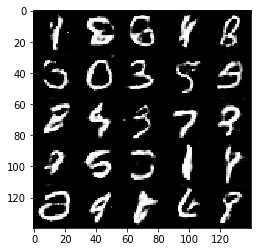

Epoch 2/2... Discriminator Loss: 0.8001... Generator Loss: 1.1643
Epoch 2/2... Discriminator Loss: 0.6483... Generator Loss: 1.7770
Epoch 2/2... Discriminator Loss: 0.7778... Generator Loss: 1.2931
Epoch 2/2... Discriminator Loss: 1.2260... Generator Loss: 0.6331
Epoch 2/2... Discriminator Loss: 0.7967... Generator Loss: 1.7581
Epoch 2/2... Discriminator Loss: 1.1254... Generator Loss: 0.8467
Epoch 2/2... Discriminator Loss: 0.6587... Generator Loss: 1.5565


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7176... Generator Loss: 1.4831
Epoch 1/1... Discriminator Loss: 0.6248... Generator Loss: 1.6337
Epoch 1/1... Discriminator Loss: 0.5751... Generator Loss: 1.8837
Epoch 1/1... Discriminator Loss: 0.4915... Generator Loss: 2.3990
Epoch 1/1... Discriminator Loss: 0.4345... Generator Loss: 2.9714
Epoch 1/1... Discriminator Loss: 0.4611... Generator Loss: 2.5003
Epoch 1/1... Discriminator Loss: 0.4425... Generator Loss: 3.8653
Epoch 1/1... Discriminator Loss: 0.5876... Generator Loss: 1.8350
Epoch 1/1... Discriminator Loss: 0.7244... Generator Loss: 1.5124
Epoch 1/1... Discriminator Loss: 0.4977... Generator Loss: 2.6727


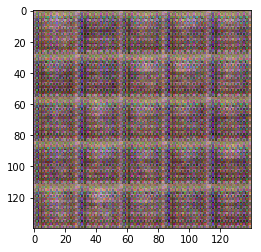

Epoch 1/1... Discriminator Loss: 1.6575... Generator Loss: 0.4989
Epoch 1/1... Discriminator Loss: 0.6313... Generator Loss: 2.5312
Epoch 1/1... Discriminator Loss: 0.7504... Generator Loss: 1.5437
Epoch 1/1... Discriminator Loss: 0.7238... Generator Loss: 1.5645
Epoch 1/1... Discriminator Loss: 0.6653... Generator Loss: 2.2438
Epoch 1/1... Discriminator Loss: 0.7264... Generator Loss: 1.3960
Epoch 1/1... Discriminator Loss: 0.5702... Generator Loss: 1.8922
Epoch 1/1... Discriminator Loss: 0.6812... Generator Loss: 1.4370
Epoch 1/1... Discriminator Loss: 0.7707... Generator Loss: 1.2425
Epoch 1/1... Discriminator Loss: 0.5922... Generator Loss: 2.8354


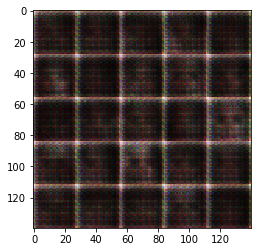

Epoch 1/1... Discriminator Loss: 0.6182... Generator Loss: 3.1800
Epoch 1/1... Discriminator Loss: 0.6153... Generator Loss: 2.3511
Epoch 1/1... Discriminator Loss: 0.7347... Generator Loss: 2.3543
Epoch 1/1... Discriminator Loss: 0.6460... Generator Loss: 2.2843
Epoch 1/1... Discriminator Loss: 0.6620... Generator Loss: 2.0788
Epoch 1/1... Discriminator Loss: 0.6125... Generator Loss: 2.1518
Epoch 1/1... Discriminator Loss: 0.6950... Generator Loss: 2.6642
Epoch 1/1... Discriminator Loss: 0.6046... Generator Loss: 1.7968
Epoch 1/1... Discriminator Loss: 0.7832... Generator Loss: 1.2957
Epoch 1/1... Discriminator Loss: 0.6294... Generator Loss: 2.5529


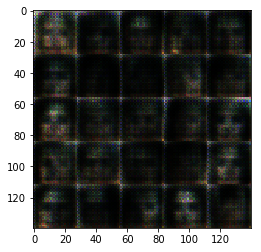

Epoch 1/1... Discriminator Loss: 0.6226... Generator Loss: 1.9115
Epoch 1/1... Discriminator Loss: 0.8381... Generator Loss: 2.6621
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 1.3449
Epoch 1/1... Discriminator Loss: 0.7493... Generator Loss: 1.7394
Epoch 1/1... Discriminator Loss: 0.6793... Generator Loss: 1.5081
Epoch 1/1... Discriminator Loss: 0.9832... Generator Loss: 0.8829
Epoch 1/1... Discriminator Loss: 0.6638... Generator Loss: 2.4346
Epoch 1/1... Discriminator Loss: 0.6514... Generator Loss: 1.8349
Epoch 1/1... Discriminator Loss: 0.5652... Generator Loss: 2.2003
Epoch 1/1... Discriminator Loss: 0.9885... Generator Loss: 0.9311


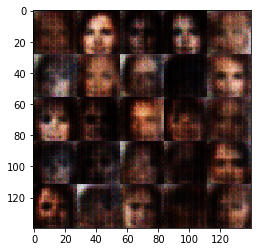

Epoch 1/1... Discriminator Loss: 0.7437... Generator Loss: 1.4438
Epoch 1/1... Discriminator Loss: 0.7452... Generator Loss: 1.6776
Epoch 1/1... Discriminator Loss: 1.0255... Generator Loss: 0.8510
Epoch 1/1... Discriminator Loss: 0.6807... Generator Loss: 2.0804
Epoch 1/1... Discriminator Loss: 0.7862... Generator Loss: 1.3487
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 2.4274
Epoch 1/1... Discriminator Loss: 0.8720... Generator Loss: 1.1454
Epoch 1/1... Discriminator Loss: 0.6989... Generator Loss: 1.5414
Epoch 1/1... Discriminator Loss: 0.9028... Generator Loss: 1.2527
Epoch 1/1... Discriminator Loss: 0.8539... Generator Loss: 1.1243


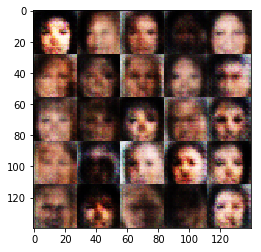

Epoch 1/1... Discriminator Loss: 0.7995... Generator Loss: 1.2621
Epoch 1/1... Discriminator Loss: 0.9628... Generator Loss: 1.0217
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 2.7268
Epoch 1/1... Discriminator Loss: 1.0507... Generator Loss: 1.5210
Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 2.9337
Epoch 1/1... Discriminator Loss: 0.9083... Generator Loss: 1.1501
Epoch 1/1... Discriminator Loss: 0.8294... Generator Loss: 1.2731
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.4781... Generator Loss: 0.4456
Epoch 1/1... Discriminator Loss: 0.9302... Generator Loss: 1.1360


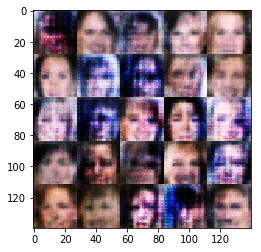

Epoch 1/1... Discriminator Loss: 0.8815... Generator Loss: 1.5179
Epoch 1/1... Discriminator Loss: 1.0885... Generator Loss: 0.7660
Epoch 1/1... Discriminator Loss: 0.9258... Generator Loss: 1.2698
Epoch 1/1... Discriminator Loss: 1.0734... Generator Loss: 2.5454
Epoch 1/1... Discriminator Loss: 1.1889... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 0.8796
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 1.6721
Epoch 1/1... Discriminator Loss: 1.0040... Generator Loss: 0.8763
Epoch 1/1... Discriminator Loss: 0.9432... Generator Loss: 0.9516
Epoch 1/1... Discriminator Loss: 1.1324... Generator Loss: 0.6977


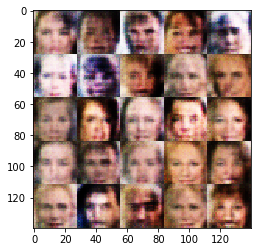

Epoch 1/1... Discriminator Loss: 1.1465... Generator Loss: 2.3913
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 1.2517
Epoch 1/1... Discriminator Loss: 1.0228... Generator Loss: 1.5312
Epoch 1/1... Discriminator Loss: 0.9063... Generator Loss: 1.0606
Epoch 1/1... Discriminator Loss: 0.9034... Generator Loss: 1.3001
Epoch 1/1... Discriminator Loss: 1.6249... Generator Loss: 0.3719
Epoch 1/1... Discriminator Loss: 0.8534... Generator Loss: 1.4301
Epoch 1/1... Discriminator Loss: 0.8777... Generator Loss: 1.2263
Epoch 1/1... Discriminator Loss: 0.9424... Generator Loss: 1.9008
Epoch 1/1... Discriminator Loss: 1.2846... Generator Loss: 2.7361


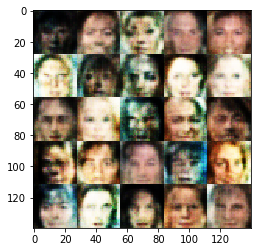

Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 0.9460... Generator Loss: 1.2169
Epoch 1/1... Discriminator Loss: 1.0427... Generator Loss: 0.8884
Epoch 1/1... Discriminator Loss: 0.9639... Generator Loss: 1.4762
Epoch 1/1... Discriminator Loss: 0.9221... Generator Loss: 1.0713
Epoch 1/1... Discriminator Loss: 1.1257... Generator Loss: 0.7660
Epoch 1/1... Discriminator Loss: 1.1112... Generator Loss: 0.6968
Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 0.8425... Generator Loss: 1.3304
Epoch 1/1... Discriminator Loss: 0.9276... Generator Loss: 1.1164


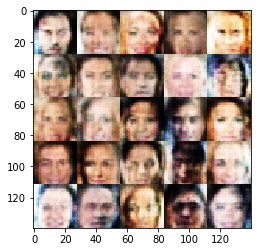

Epoch 1/1... Discriminator Loss: 1.1449... Generator Loss: 0.6998
Epoch 1/1... Discriminator Loss: 0.8538... Generator Loss: 1.7358
Epoch 1/1... Discriminator Loss: 0.8873... Generator Loss: 1.2428
Epoch 1/1... Discriminator Loss: 0.9329... Generator Loss: 1.8721
Epoch 1/1... Discriminator Loss: 1.2533... Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 0.9011... Generator Loss: 1.0666
Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 2.5744
Epoch 1/1... Discriminator Loss: 0.9295... Generator Loss: 1.0118
Epoch 1/1... Discriminator Loss: 0.9034... Generator Loss: 1.8990
Epoch 1/1... Discriminator Loss: 0.9357... Generator Loss: 1.9509


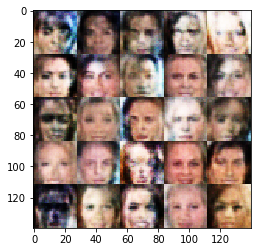

Epoch 1/1... Discriminator Loss: 0.8842... Generator Loss: 1.3272
Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 2.1926
Epoch 1/1... Discriminator Loss: 0.9878... Generator Loss: 1.0392
Epoch 1/1... Discriminator Loss: 0.9175... Generator Loss: 1.4172
Epoch 1/1... Discriminator Loss: 1.2689... Generator Loss: 0.5952
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 2.3550
Epoch 1/1... Discriminator Loss: 0.8385... Generator Loss: 1.5015
Epoch 1/1... Discriminator Loss: 0.9205... Generator Loss: 1.0740
Epoch 1/1... Discriminator Loss: 0.9656... Generator Loss: 1.0079
Epoch 1/1... Discriminator Loss: 1.0260... Generator Loss: 0.9588


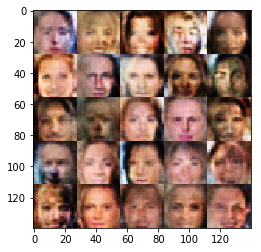

Epoch 1/1... Discriminator Loss: 0.8685... Generator Loss: 1.2161
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 1.2448
Epoch 1/1... Discriminator Loss: 0.8823... Generator Loss: 1.6177
Epoch 1/1... Discriminator Loss: 0.9345... Generator Loss: 1.1396
Epoch 1/1... Discriminator Loss: 0.9993... Generator Loss: 0.9004
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 1.1805... Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 0.9530... Generator Loss: 1.3810
Epoch 1/1... Discriminator Loss: 1.5735... Generator Loss: 0.3964
Epoch 1/1... Discriminator Loss: 1.1468... Generator Loss: 0.8426


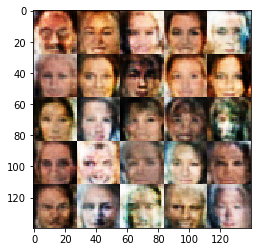

Epoch 1/1... Discriminator Loss: 0.9509... Generator Loss: 1.0813
Epoch 1/1... Discriminator Loss: 0.9398... Generator Loss: 1.3507
Epoch 1/1... Discriminator Loss: 0.8517... Generator Loss: 1.2653
Epoch 1/1... Discriminator Loss: 1.0668... Generator Loss: 0.8000
Epoch 1/1... Discriminator Loss: 1.0148... Generator Loss: 0.8599
Epoch 1/1... Discriminator Loss: 0.9527... Generator Loss: 1.6386
Epoch 1/1... Discriminator Loss: 1.0242... Generator Loss: 0.9634
Epoch 1/1... Discriminator Loss: 0.7920... Generator Loss: 1.4048
Epoch 1/1... Discriminator Loss: 0.8272... Generator Loss: 1.2211
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 1.1022


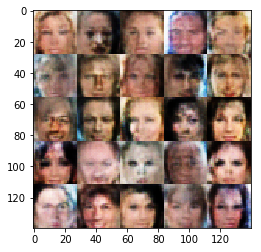

Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 0.9104
Epoch 1/1... Discriminator Loss: 1.1802... Generator Loss: 0.6582
Epoch 1/1... Discriminator Loss: 1.1031... Generator Loss: 0.7344
Epoch 1/1... Discriminator Loss: 1.0675... Generator Loss: 1.9636
Epoch 1/1... Discriminator Loss: 0.8210... Generator Loss: 1.8365
Epoch 1/1... Discriminator Loss: 1.7272... Generator Loss: 0.3624
Epoch 1/1... Discriminator Loss: 1.1854... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 0.8194
Epoch 1/1... Discriminator Loss: 0.9903... Generator Loss: 2.1304
Epoch 1/1... Discriminator Loss: 1.0719... Generator Loss: 0.7569


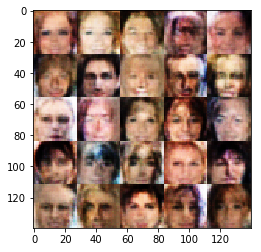

Epoch 1/1... Discriminator Loss: 0.8636... Generator Loss: 1.0302
Epoch 1/1... Discriminator Loss: 1.1142... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 0.8407... Generator Loss: 1.2753
Epoch 1/1... Discriminator Loss: 1.0803... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.1291... Generator Loss: 2.4959
Epoch 1/1... Discriminator Loss: 0.8278... Generator Loss: 1.3273
Epoch 1/1... Discriminator Loss: 0.9392... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 0.8506... Generator Loss: 1.6643
Epoch 1/1... Discriminator Loss: 1.6131... Generator Loss: 0.3745
Epoch 1/1... Discriminator Loss: 0.8288... Generator Loss: 1.4626


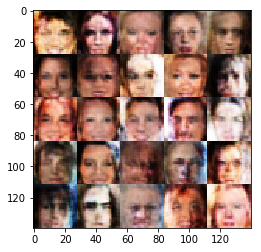

Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 0.8434
Epoch 1/1... Discriminator Loss: 1.0079... Generator Loss: 1.0050
Epoch 1/1... Discriminator Loss: 1.1376... Generator Loss: 0.7192
Epoch 1/1... Discriminator Loss: 1.0954... Generator Loss: 0.7285
Epoch 1/1... Discriminator Loss: 0.7782... Generator Loss: 1.5321
Epoch 1/1... Discriminator Loss: 1.0009... Generator Loss: 1.0451
Epoch 1/1... Discriminator Loss: 0.9773... Generator Loss: 0.8950
Epoch 1/1... Discriminator Loss: 0.8857... Generator Loss: 1.3071
Epoch 1/1... Discriminator Loss: 0.9140... Generator Loss: 1.0704
Epoch 1/1... Discriminator Loss: 0.9732... Generator Loss: 1.4211


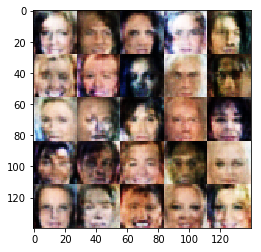

Epoch 1/1... Discriminator Loss: 0.9868... Generator Loss: 0.8758
Epoch 1/1... Discriminator Loss: 0.7556... Generator Loss: 1.4544
Epoch 1/1... Discriminator Loss: 0.8778... Generator Loss: 1.0887
Epoch 1/1... Discriminator Loss: 1.0846... Generator Loss: 0.8809
Epoch 1/1... Discriminator Loss: 1.6063... Generator Loss: 0.3777
Epoch 1/1... Discriminator Loss: 0.8314... Generator Loss: 1.9073
Epoch 1/1... Discriminator Loss: 1.1699... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 1.0102... Generator Loss: 1.7361
Epoch 1/1... Discriminator Loss: 1.1870... Generator Loss: 0.6770
Epoch 1/1... Discriminator Loss: 1.2273... Generator Loss: 0.6354


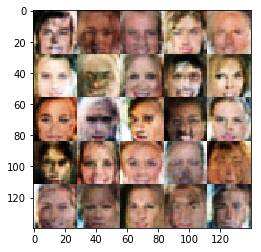

Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 0.8637... Generator Loss: 1.1541
Epoch 1/1... Discriminator Loss: 0.7779... Generator Loss: 1.7553
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.5802
Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 0.5004
Epoch 1/1... Discriminator Loss: 0.8918... Generator Loss: 1.2268
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 1.5565
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.5095
Epoch 1/1... Discriminator Loss: 0.8556... Generator Loss: 1.3493
Epoch 1/1... Discriminator Loss: 0.7584... Generator Loss: 1.5991


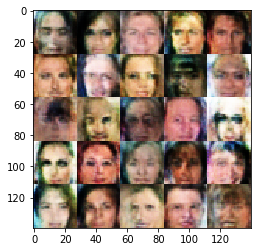

Epoch 1/1... Discriminator Loss: 0.8070... Generator Loss: 1.3604
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 1.3250
Epoch 1/1... Discriminator Loss: 1.2282... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 0.7428... Generator Loss: 2.2276
Epoch 1/1... Discriminator Loss: 1.1421... Generator Loss: 2.1219
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 1.7213
Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 1.2490
Epoch 1/1... Discriminator Loss: 0.9424... Generator Loss: 0.9517
Epoch 1/1... Discriminator Loss: 0.8064... Generator Loss: 1.5262


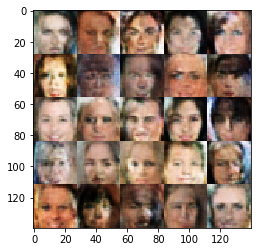

Epoch 1/1... Discriminator Loss: 0.9198... Generator Loss: 1.7479
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.4694
Epoch 1/1... Discriminator Loss: 0.8657... Generator Loss: 1.0612
Epoch 1/1... Discriminator Loss: 0.7841... Generator Loss: 1.4661
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 2.2885
Epoch 1/1... Discriminator Loss: 1.2258... Generator Loss: 0.9081
Epoch 1/1... Discriminator Loss: 0.9628... Generator Loss: 1.0730
Epoch 1/1... Discriminator Loss: 0.7971... Generator Loss: 1.2897
Epoch 1/1... Discriminator Loss: 1.6353... Generator Loss: 3.3896
Epoch 1/1... Discriminator Loss: 1.0154... Generator Loss: 1.4650


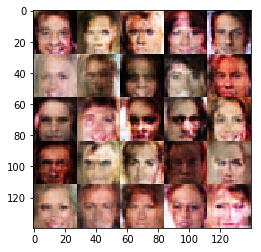

Epoch 1/1... Discriminator Loss: 0.9536... Generator Loss: 1.1115
Epoch 1/1... Discriminator Loss: 1.2101... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 0.9651... Generator Loss: 0.8479
Epoch 1/1... Discriminator Loss: 1.2177... Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 0.9323... Generator Loss: 0.9632
Epoch 1/1... Discriminator Loss: 0.9491... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 0.9978... Generator Loss: 0.8417
Epoch 1/1... Discriminator Loss: 0.9865... Generator Loss: 0.8859
Epoch 1/1... Discriminator Loss: 1.0843... Generator Loss: 2.4163
Epoch 1/1... Discriminator Loss: 0.7164... Generator Loss: 1.6679


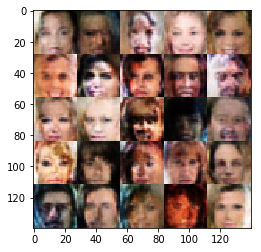

Epoch 1/1... Discriminator Loss: 0.9074... Generator Loss: 1.4848
Epoch 1/1... Discriminator Loss: 0.9839... Generator Loss: 1.4391
Epoch 1/1... Discriminator Loss: 0.7716... Generator Loss: 1.5179
Epoch 1/1... Discriminator Loss: 0.8097... Generator Loss: 1.8298
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 0.6539... Generator Loss: 1.8572
Epoch 1/1... Discriminator Loss: 0.5961... Generator Loss: 2.0224
Epoch 1/1... Discriminator Loss: 0.8172... Generator Loss: 1.1876
Epoch 1/1... Discriminator Loss: 1.1865... Generator Loss: 1.2747
Epoch 1/1... Discriminator Loss: 0.9329... Generator Loss: 1.1840


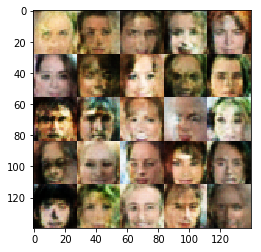

Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 1.0894
Epoch 1/1... Discriminator Loss: 0.7407... Generator Loss: 1.7806
Epoch 1/1... Discriminator Loss: 0.7946... Generator Loss: 1.4098
Epoch 1/1... Discriminator Loss: 0.6328... Generator Loss: 2.2058
Epoch 1/1... Discriminator Loss: 0.7295... Generator Loss: 1.6076
Epoch 1/1... Discriminator Loss: 0.7102... Generator Loss: 1.5893
Epoch 1/1... Discriminator Loss: 0.8591... Generator Loss: 1.0260
Epoch 1/1... Discriminator Loss: 0.8860... Generator Loss: 1.0168
Epoch 1/1... Discriminator Loss: 0.8138... Generator Loss: 1.2429
Epoch 1/1... Discriminator Loss: 0.9674... Generator Loss: 0.8313


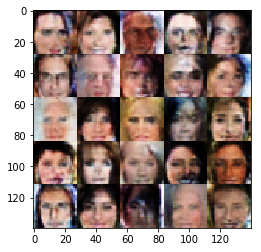

Epoch 1/1... Discriminator Loss: 0.5601... Generator Loss: 1.9439
Epoch 1/1... Discriminator Loss: 1.2072... Generator Loss: 2.8365
Epoch 1/1... Discriminator Loss: 0.8539... Generator Loss: 1.3516
Epoch 1/1... Discriminator Loss: 0.9547... Generator Loss: 0.8979
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.5004
Epoch 1/1... Discriminator Loss: 0.5482... Generator Loss: 2.3910
Epoch 1/1... Discriminator Loss: 0.6568... Generator Loss: 1.5222
Epoch 1/1... Discriminator Loss: 0.5660... Generator Loss: 2.1454
Epoch 1/1... Discriminator Loss: 0.7797... Generator Loss: 1.1990
Epoch 1/1... Discriminator Loss: 0.7918... Generator Loss: 1.1710


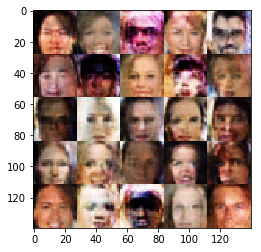

Epoch 1/1... Discriminator Loss: 0.6040... Generator Loss: 1.6828
Epoch 1/1... Discriminator Loss: 0.7290... Generator Loss: 1.4142
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.5393
Epoch 1/1... Discriminator Loss: 0.7881... Generator Loss: 1.2000
Epoch 1/1... Discriminator Loss: 0.6322... Generator Loss: 1.7690
Epoch 1/1... Discriminator Loss: 1.5999... Generator Loss: 0.3902
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.5181
Epoch 1/1... Discriminator Loss: 0.5899... Generator Loss: 1.7700
Epoch 1/1... Discriminator Loss: 0.7479... Generator Loss: 1.9211
Epoch 1/1... Discriminator Loss: 0.7231... Generator Loss: 1.2981


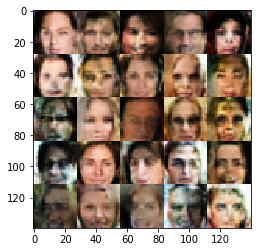

Epoch 1/1... Discriminator Loss: 0.7992... Generator Loss: 1.1589
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.5281
Epoch 1/1... Discriminator Loss: 1.0654... Generator Loss: 0.7628
Epoch 1/1... Discriminator Loss: 0.5357... Generator Loss: 2.1940
Epoch 1/1... Discriminator Loss: 0.7678... Generator Loss: 1.5389
Epoch 1/1... Discriminator Loss: 0.7351... Generator Loss: 1.8156
Epoch 1/1... Discriminator Loss: 0.5742... Generator Loss: 1.9063
Epoch 1/1... Discriminator Loss: 0.7930... Generator Loss: 1.9801
Epoch 1/1... Discriminator Loss: 0.7413... Generator Loss: 1.2580
Epoch 1/1... Discriminator Loss: 0.6783... Generator Loss: 1.5700


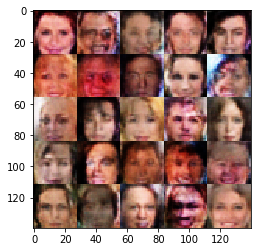

Epoch 1/1... Discriminator Loss: 0.6114... Generator Loss: 1.8109
Epoch 1/1... Discriminator Loss: 0.9774... Generator Loss: 2.3715
Epoch 1/1... Discriminator Loss: 0.7783... Generator Loss: 1.7414
Epoch 1/1... Discriminator Loss: 1.0079... Generator Loss: 0.8427
Epoch 1/1... Discriminator Loss: 0.5669... Generator Loss: 2.0500
Epoch 1/1... Discriminator Loss: 0.6091... Generator Loss: 2.7129
Epoch 1/1... Discriminator Loss: 0.6840... Generator Loss: 1.4341
Epoch 1/1... Discriminator Loss: 0.5735... Generator Loss: 1.8842
Epoch 1/1... Discriminator Loss: 1.0279... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 0.7408... Generator Loss: 1.7614


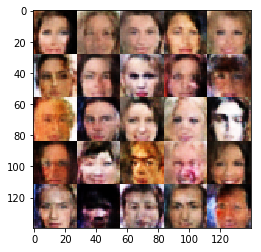

Epoch 1/1... Discriminator Loss: 0.9748... Generator Loss: 0.8343
Epoch 1/1... Discriminator Loss: 0.5737... Generator Loss: 2.2433
Epoch 1/1... Discriminator Loss: 0.5845... Generator Loss: 1.7879
Epoch 1/1... Discriminator Loss: 0.6143... Generator Loss: 3.6137
Epoch 1/1... Discriminator Loss: 0.7213... Generator Loss: 2.5945
Epoch 1/1... Discriminator Loss: 0.6171... Generator Loss: 1.6320
Epoch 1/1... Discriminator Loss: 0.7815... Generator Loss: 1.1789
Epoch 1/1... Discriminator Loss: 0.5489... Generator Loss: 2.0361
Epoch 1/1... Discriminator Loss: 0.5978... Generator Loss: 1.6769
Epoch 1/1... Discriminator Loss: 0.5797... Generator Loss: 2.0916


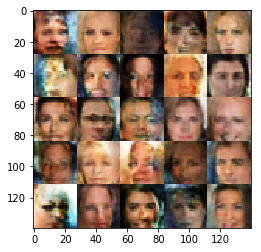

Epoch 1/1... Discriminator Loss: 0.4802... Generator Loss: 2.8276
Epoch 1/1... Discriminator Loss: 0.5529... Generator Loss: 2.1552
Epoch 1/1... Discriminator Loss: 0.5679... Generator Loss: 2.3836
Epoch 1/1... Discriminator Loss: 0.4581... Generator Loss: 3.2422
Epoch 1/1... Discriminator Loss: 0.4480... Generator Loss: 2.8304
Epoch 1/1... Discriminator Loss: 0.5390... Generator Loss: 2.7727
Epoch 1/1... Discriminator Loss: 0.6498... Generator Loss: 1.5247
Epoch 1/1... Discriminator Loss: 0.9192... Generator Loss: 0.9456
Epoch 1/1... Discriminator Loss: 0.5907... Generator Loss: 3.2418
Epoch 1/1... Discriminator Loss: 0.6202... Generator Loss: 1.6396


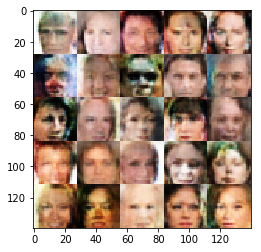

Epoch 1/1... Discriminator Loss: 0.7872... Generator Loss: 1.2567
Epoch 1/1... Discriminator Loss: 3.7890... Generator Loss: 5.0665
Epoch 1/1... Discriminator Loss: 0.8822... Generator Loss: 1.0515
Epoch 1/1... Discriminator Loss: 0.5110... Generator Loss: 2.8182
Epoch 1/1... Discriminator Loss: 0.5135... Generator Loss: 2.1726
Epoch 1/1... Discriminator Loss: 0.4891... Generator Loss: 2.6811
Epoch 1/1... Discriminator Loss: 0.7331... Generator Loss: 1.2708
Epoch 1/1... Discriminator Loss: 0.5500... Generator Loss: 1.9047
Epoch 1/1... Discriminator Loss: 0.5170... Generator Loss: 2.5780
Epoch 1/1... Discriminator Loss: 0.5232... Generator Loss: 2.4100


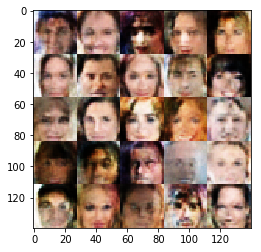

Epoch 1/1... Discriminator Loss: 0.5198... Generator Loss: 2.1088
Epoch 1/1... Discriminator Loss: 0.4452... Generator Loss: 3.3341
Epoch 1/1... Discriminator Loss: 0.5481... Generator Loss: 2.3582
Epoch 1/1... Discriminator Loss: 0.5344... Generator Loss: 2.3829
Epoch 1/1... Discriminator Loss: 0.5302... Generator Loss: 2.0274
Epoch 1/1... Discriminator Loss: 0.5491... Generator Loss: 2.2320
Epoch 1/1... Discriminator Loss: 0.5051... Generator Loss: 2.3888
Epoch 1/1... Discriminator Loss: 0.5662... Generator Loss: 2.3294
Epoch 1/1... Discriminator Loss: 1.5658... Generator Loss: 0.4272
Epoch 1/1... Discriminator Loss: 4.2975... Generator Loss: 5.7951


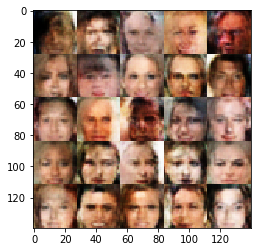

Epoch 1/1... Discriminator Loss: 0.8419... Generator Loss: 1.3499
Epoch 1/1... Discriminator Loss: 0.7519... Generator Loss: 1.5035
Epoch 1/1... Discriminator Loss: 0.5845... Generator Loss: 2.1575
Epoch 1/1... Discriminator Loss: 0.7159... Generator Loss: 1.3516
Epoch 1/1... Discriminator Loss: 0.5592... Generator Loss: 1.9892
Epoch 1/1... Discriminator Loss: 0.4906... Generator Loss: 3.0500


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.